In [1]:
#Import all necessary Libraries
#Data Analysis
import pandas as pd
import numpy as np

#Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns 

#Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import LabelEncoder

In [2]:
#Classifiers Lib./ ML Agolri.
#!pip install xgboost
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


In [3]:
#Evaluation Metrics 
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix


In [4]:
#ignore warnings 
import warnings
warnings.filterwarnings("ignore")

In [5]:
#Load Dataset
df=pd.read_csv(r"C:\\Users\Akolgo Matthew Asi\\Desktop\\10Alytics\\CLASS VIDEOS\\ML\\Supervised Machine Learning\\Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#Dropping irrelent columns 

In [7]:
df= df.drop(["customerID"],axis=1)

In [8]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [10]:
#Checking for missing Values 

In [11]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#From our data we dont have any missing values

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#These decribes our data in terms of statistics which provides the mean,count,standard div.,etc.

In [15]:
##Exploratory Data Analysis

In [16]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: xlabel='tenure'>

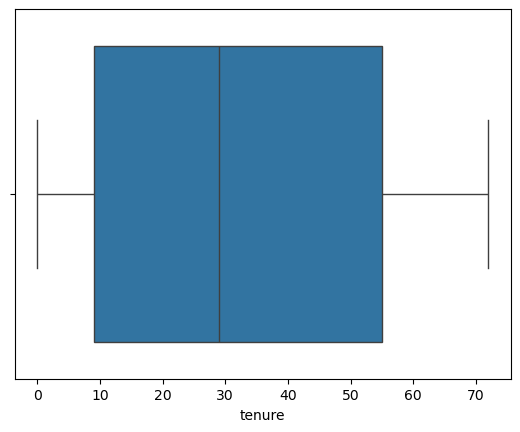

In [17]:
#check for Outliers in some columns 
sns.boxplot(x=df["tenure"])

<Axes: xlabel='MonthlyCharges'>

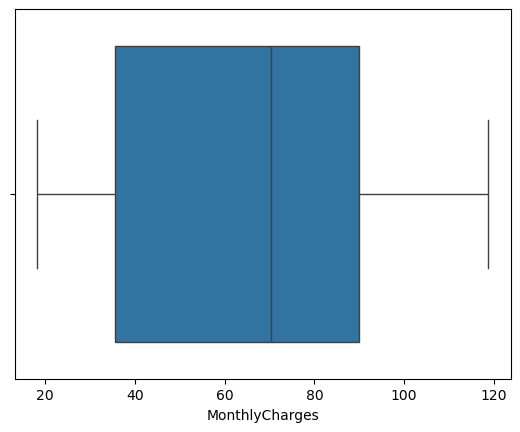

In [18]:
sns.boxplot(x=df["MonthlyCharges"])

<Axes: xlabel='TotalCharges'>

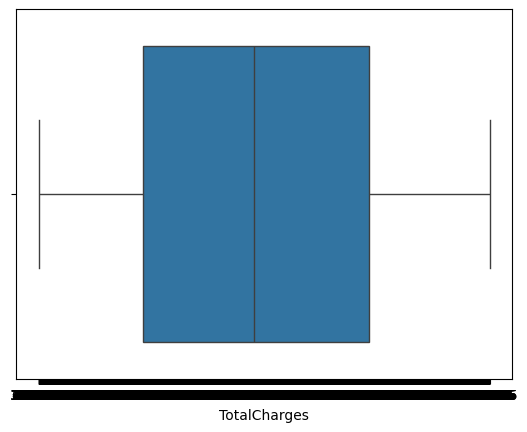

In [19]:
sns.boxplot(x=df["TotalCharges"])

#No Outliers in coulmns above.

Text(0.5, 1.0, 'Total Number of Customer')

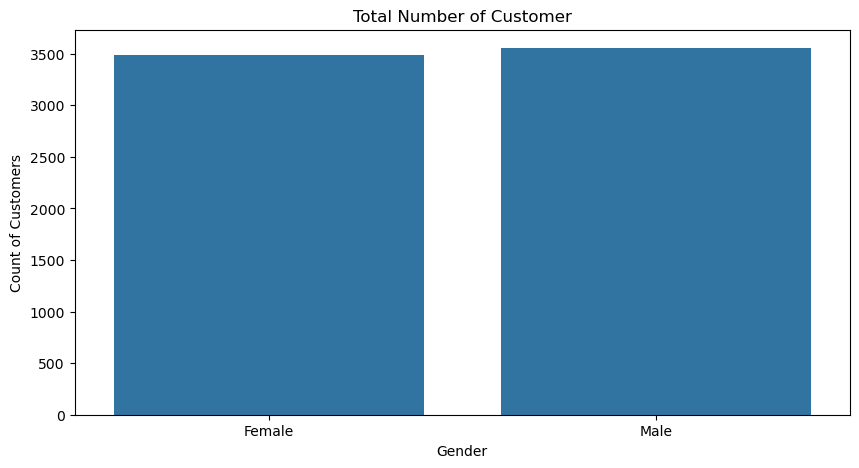

In [21]:
#Data Visualisation for gender

plt.figure (figsize=(10,5))
sns.countplot(x="gender",data=df)
plt.xlabel("Gender")
plt.ylabel("Count of Customers")
plt.title("Total Number of Customer")

#this Represent the total number of female and male customers the company has. 

Text(0.5, 1.0, 'Total Number of Customer')

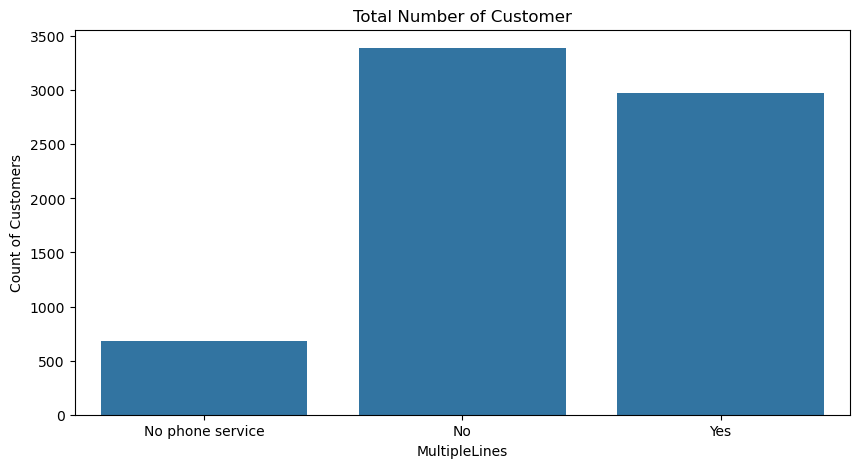

In [23]:
plt.figure (figsize=(10,5))
sns.countplot(x="MultipleLines",data=df)
plt.xlabel("MultipleLines")
plt.ylabel("Count of Customers")
plt.title("Total Number of Customer")

#show the number of cusomers with Multiple lines 

Text(0.5, 1.0, 'Total Number of Customer')

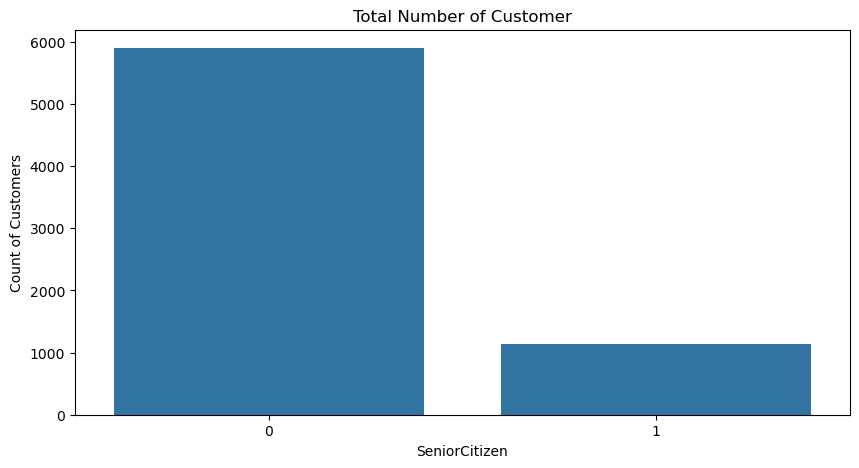

In [25]:
plt.figure (figsize=(10,5))
sns.countplot(x="SeniorCitizen",data=df)
plt.xlabel("SeniorCitizen")
plt.ylabel("Count of Customers")
plt.title("Total Number of Customer")

#Displays the number of senior citizen that are subscribed to the company's services 

Churn
No     5174
Yes    1869
Name: count, dtype: int64


Text(0.5, 1.0, 'Total Number of Customer')

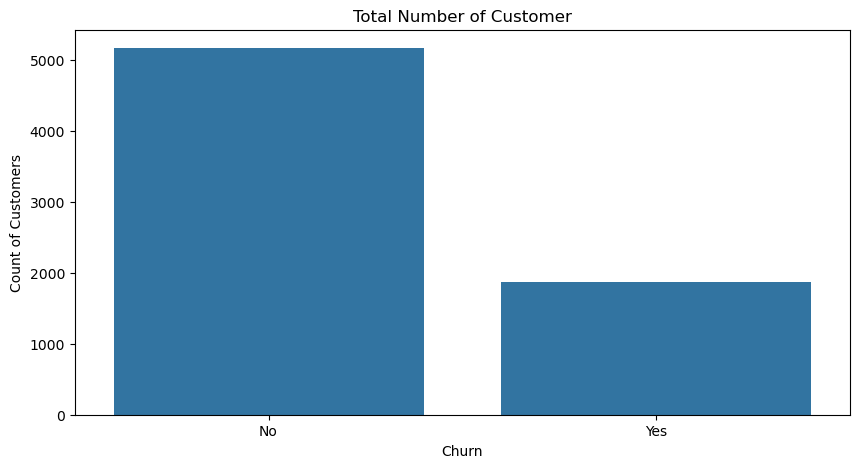

In [27]:
print(df["Churn"].value_counts())
plt.figure (figsize=(10,5))
sns.countplot(x="Churn",data=df)
plt.xlabel("Churn")
plt.ylabel("Count of Customers")
plt.title("Total Number of Customer")

#Total number of customers who stop using the company's services

In [29]:
#Categorical featues 

In [30]:
numerical_df = df.select_dtypes(exclude = ["object"])
numerical_df.head()

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


In [31]:
#Bivariate Analysis

gender
Male      3555
Female    3488
Name: count, dtype: int64


Text(0.5, 1.0, 'Total Number of Customer')

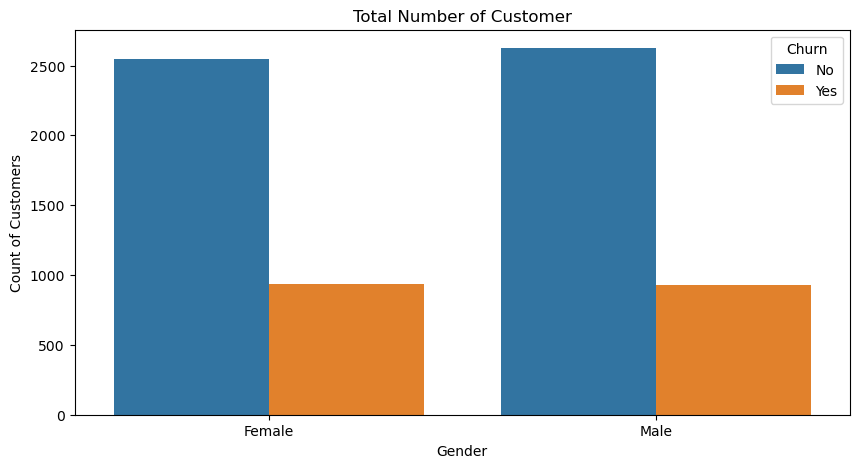

In [32]:
print(df["gender"].value_counts())
plt.figure (figsize=(10,5))
sns.countplot(x="gender",data=df,hue='Churn')
plt.xlabel("Gender")
plt.ylabel("Count of Customers")
plt.title("Total Number of Customer")

#total number of customers who churn based on gender 

In [34]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Partner
No     3641
Yes    3402
Name: count, dtype: int64


Text(0.5, 1.0, 'Total Number of Customer')

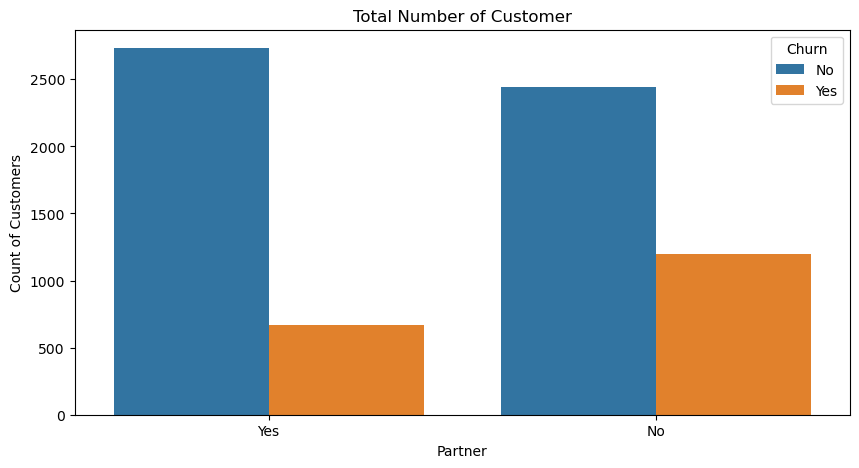

In [35]:
print(df["Partner"].value_counts())
plt.figure (figsize=(10,5))
sns.countplot(x="Partner",data=df,hue='Churn')
plt.xlabel("Partner")
plt.ylabel("Count of Customers")
plt.title("Total Number of Customer")

#Total number of customers who churn based on having partners .

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


Text(0.5, 1.0, 'Total Number of Customer with Contract')

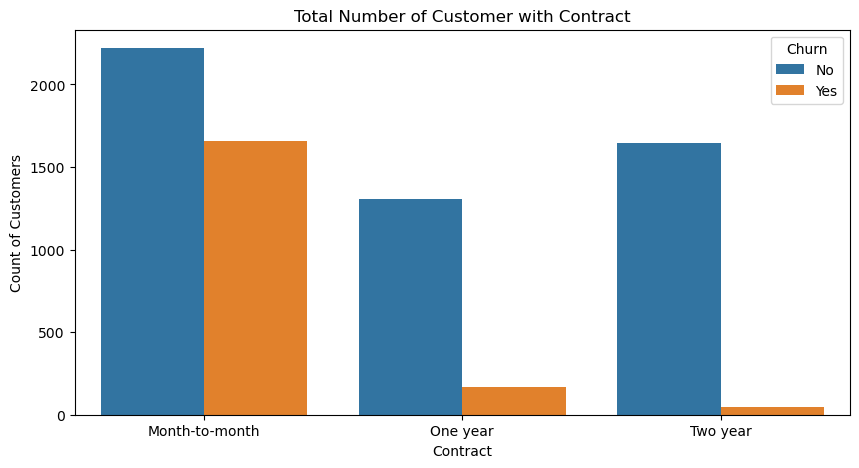

In [37]:
print(df["Contract"].value_counts())
plt.figure (figsize=(10,5))
sns.countplot(x="Contract",data=df,hue='Churn')
plt.xlabel("Contract")
plt.ylabel("Count of Customers")
plt.title("Total Number of Customer with Contract")

#Total number of customers with contracts . month to month customers are the most people who turn to chrun from the company . The company loyal customers are the people with the two year contract , they stay longer and churn less as compared to the one year contract customers.

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64


Text(0.5, 1.0, 'Total Number of Customer with TechSupport')

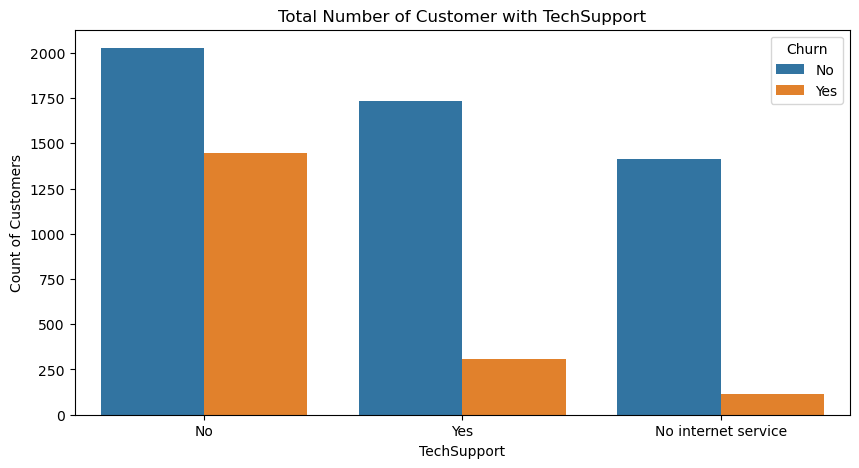

In [39]:
print(df["TechSupport"].value_counts())
plt.figure (figsize=(10,5))
sns.countplot(x="TechSupport",data=df,hue='Churn')
plt.xlabel("TechSupport")
plt.ylabel("Count of Customers")
plt.title("Total Number of Customer with TechSupport")

#Total number  of customer who churn while having TechSupport . From the data it can be observed that customers who churn less are the ones with No internet service (1526) followed by the the group with tech support and we have 3473 with no tech support churning.

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64


Text(0.5, 1.0, 'Total Number of Customer')

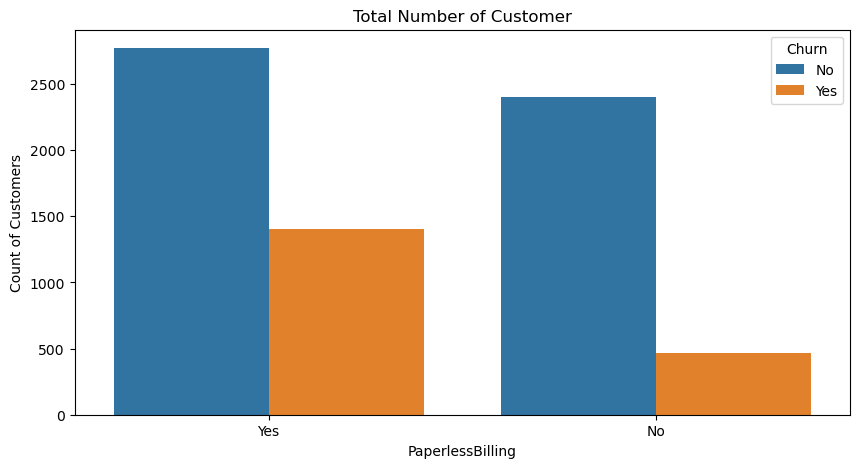

In [41]:
print(df["PaperlessBilling"].value_counts())
plt.figure (figsize=(10,5))
sns.countplot(x="PaperlessBilling",data=df,hue='Churn')
plt.xlabel("PaperlessBilling")
plt.ylabel("Count of Customers")
plt.title("Total Number of Customer")

#4171 customers with Paperlessbilling turn to churn as compared to the customer who are not on papaerlesbilling (2872)

In [43]:
#Multivariate Analysis

In [44]:
numerical_df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


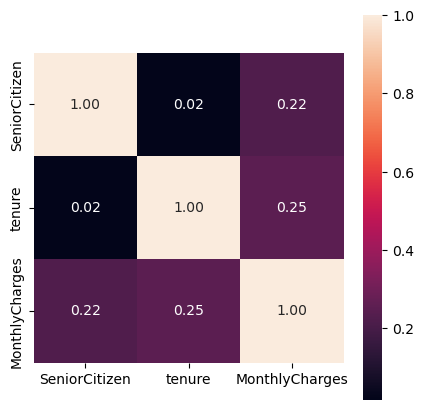

In [45]:
plt.figure(figsize=(5,5))
hm = sns.heatmap(numerical_df.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.show()

In [46]:
#Question 3
#Perform feature engineering: a) Encoding categorical variables

In [47]:
df = df.select_dtypes(include = "object")
df.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [48]:
df["gender"].nunique()

2

In [49]:
cats_df = df.columns.to_list()

for feature in cats_df:
    print(f"{feature} -----------------> {df[feature].nunique()}")
   

gender -----------------> 2
Partner -----------------> 2
Dependents -----------------> 2
PhoneService -----------------> 2
MultipleLines -----------------> 3
InternetService -----------------> 3
OnlineSecurity -----------------> 3
OnlineBackup -----------------> 3
DeviceProtection -----------------> 3
TechSupport -----------------> 3
StreamingTV -----------------> 3
StreamingMovies -----------------> 3
Contract -----------------> 3
PaperlessBilling -----------------> 2
PaymentMethod -----------------> 4
TotalCharges -----------------> 6531
Churn -----------------> 2


In [50]:
for feature in cats_df:
    print(feature)
    print(df[feature].unique())
    print("\n")

gender
['Female' 'Male']


Partner
['Yes' 'No']


Dependents
['No' 'Yes']


PhoneService
['No' 'Yes']


MultipleLines
['No phone service' 'No' 'Yes']


InternetService
['DSL' 'Fiber optic' 'No']


OnlineSecurity
['No' 'Yes' 'No internet service']


OnlineBackup
['Yes' 'No' 'No internet service']


DeviceProtection
['No' 'Yes' 'No internet service']


TechSupport
['No' 'Yes' 'No internet service']


StreamingTV
['No' 'Yes' 'No internet service']


StreamingMovies
['No' 'Yes' 'No internet service']


Contract
['Month-to-month' 'One year' 'Two year']


PaperlessBilling
['Yes' 'No']


PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


TotalCharges
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


Churn
['No' 'Yes']




In [51]:
#converting strings to floats
#using label encoder
encoder=LabelEncoder()
for i in df[0:]:
    if (df[i].dtype=="object"):
        df[i]=encoder.fit_transform(df[i])
    else:
        df[i]=df[i]
df.head() 

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,2505,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,1466,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,157,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,1400,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,925,1


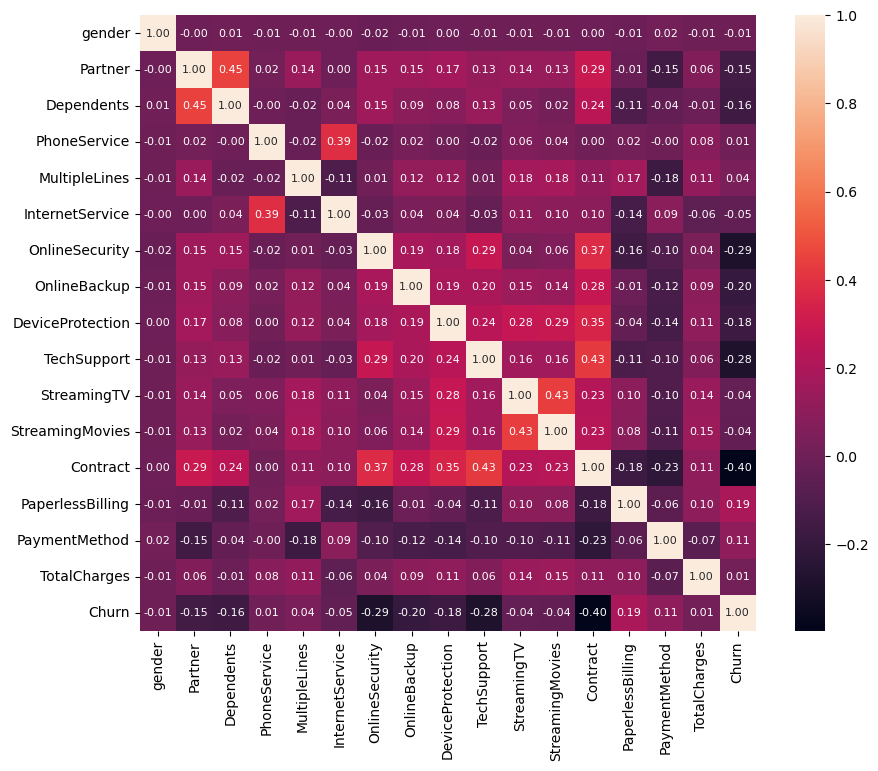

In [52]:
plt.figure(figsize=(10,8))
hm = sns.heatmap(df.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8})
plt.show()

In [53]:
#TechSupport and Contract have a some positive correlation between them likewise steamingTv and StreamingMovies.

In [54]:
# Data preprocessing / Feature Engineering

In [55]:
# 4.Model selection, training, and validation

In [56]:
df.head(3)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,2505,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,1466,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,157,1


In [57]:
df1=df[['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','TotalCharges']]

label = df[['Churn']]

In [58]:
df1.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
0,0,1,0,0,1,0,0,2,0,0,0,0,1,2,2505
1,1,0,0,1,0,0,2,0,2,0,0,1,0,3,1466
2,1,0,0,1,0,0,2,2,0,0,0,0,1,3,157
3,1,0,0,0,1,0,2,0,2,0,0,1,0,0,1400
4,0,0,0,1,0,1,0,0,0,0,0,0,1,2,925


In [59]:
label.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [60]:
df1.dtypes

gender              int32
Partner             int32
Dependents          int32
PhoneService        int32
MultipleLines       int32
InternetService     int32
OnlineSecurity      int32
OnlineBackup        int32
DeviceProtection    int32
StreamingTV         int32
StreamingMovies     int32
Contract            int32
PaperlessBilling    int32
PaymentMethod       int32
TotalCharges        int32
dtype: object

In [61]:
#Normalizing Data
#using minmaxscaler

In [62]:
scaler=MinMaxScaler()
df1["Scaled_TotalCharges"]=scaler.fit_transform(df1["TotalCharges"].values.reshape(-1,1))
df1.drop(["TotalCharges"],axis=1,inplace=True)
df1.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Scaled_TotalCharges
0,0,1,0,0,1,0,0,2,0,0,0,0,1,2,0.383614
1,1,0,0,1,0,0,2,0,2,0,0,1,0,3,0.224502
2,1,0,0,1,0,0,2,2,0,0,0,0,1,3,0.024043
3,1,0,0,0,1,0,2,0,2,0,0,1,0,0,0.214395
4,0,0,0,1,0,1,0,0,0,0,0,0,1,2,0.141654


In [63]:
#a) Train and test at least 3 supervised learning model


In [64]:
X_train,X_test,y_train,y_test=train_test_split(df1,label,test_size=0.2,random_state=42)

In [65]:
#model Building
#Logistics regression
log=LogisticRegression()
log.fit(X_train,y_train)
log_pre=log.predict(X_test)

print("Logistic Regression")
print("Accuracy:",accuracy_score(y_test,log_pre))
print("Precision:",precision_score(y_test,log_pre))
print("Recall:",recall_score(y_test,log_pre))
print("F1-score:",f1_score(y_test,log_pre))
print("AUC_ROC:",roc_auc_score(y_test,log_pre))

Logistic Regression
Accuracy: 0.7750177430801988
Precision: 0.599290780141844
Recall: 0.45308310991957107
F1-score: 0.516030534351145
AUC_ROC: 0.672004875423106


In [66]:
#Narration for this?

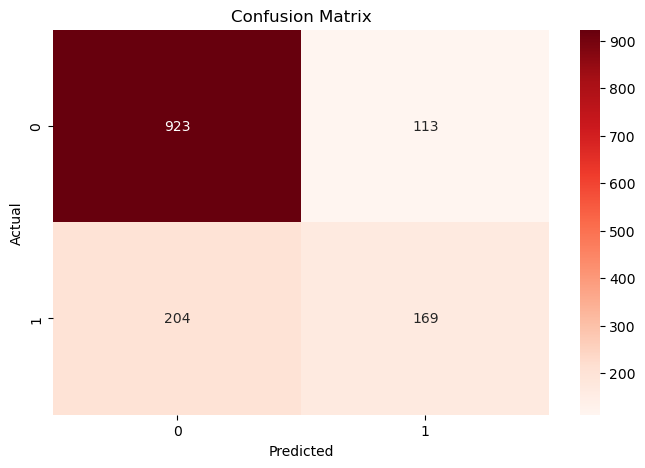

In [67]:
#Confusion Matrix
conf=confusion_matrix(y_test,log_pre)
plt.figure (figsize=(8,5))
sns.heatmap(conf, annot=True,cmap="Reds",fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [68]:
#RandomForest Classifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pre=rfc.predict(X_test)

print("RandomForestClassifier")
print("Accuracy:",accuracy_score(y_test,rfc_pre))
print("Precision:",precision_score(y_test,rfc_pre))
print("Recall:",recall_score(y_test,rfc_pre))
print("F1-score:",f1_score(y_test,rfc_pre))
print("AUC_ROC:",roc_auc_score(y_test,rfc_pre))

RandomForestClassifier
Accuracy: 0.772888573456352
Precision: 0.5985130111524164
Recall: 0.4316353887399464
F1-score: 0.5015576323987538
AUC_ROC: 0.6636941422464211


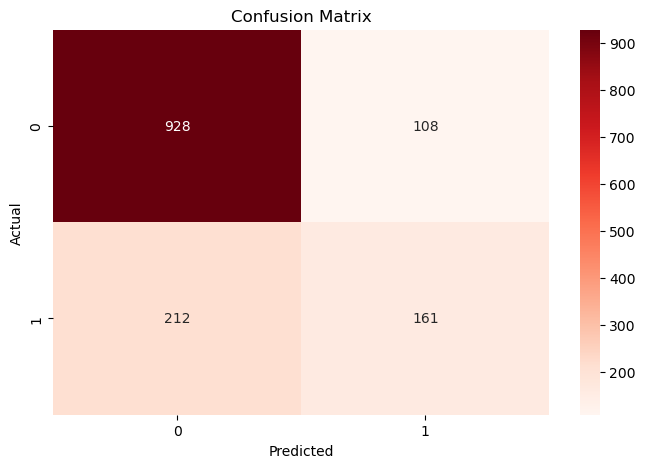

In [69]:
#Confusion Matrix
conf=confusion_matrix(y_test,rfc_pre)
plt.figure (figsize=(8,5))
sns.heatmap(conf, annot=True,cmap="Reds",fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [70]:
#DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_pre=rfc.predict(X_test)

print("DecisionTreeClassifier")
print("Accuracy:",accuracy_score(y_test,dtc_pre))
print("Precision:",precision_score(y_test,dtc_pre))
print("Recall:",recall_score(y_test,dtc_pre))
print("F1-score:",f1_score(y_test,dtc_pre))
print("AUC_ROC:",roc_auc_score(y_test,dtc_pre))

DecisionTreeClassifier
Accuracy: 0.772888573456352
Precision: 0.5985130111524164
Recall: 0.4316353887399464
F1-score: 0.5015576323987538
AUC_ROC: 0.6636941422464211


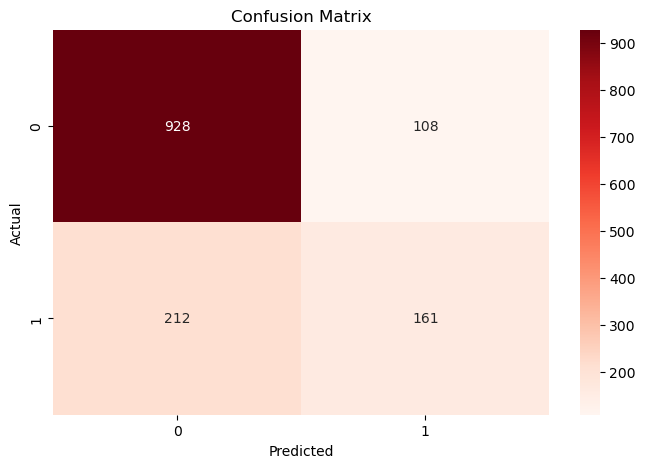

In [71]:
#Confusion Matrix
conf=confusion_matrix(y_test,dtc_pre)
plt.figure (figsize=(8,5))
sns.heatmap(conf, annot=True,cmap="Reds",fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [72]:
#Deploying all classifiers at once

In [73]:
#CLASSIFIERS
Classifiers=[[SGDClassifier(), "SGDClassifier"],
[XGBClassifier(),"XGB Classifier"],
[KNeighborsClassifier(), "KNeighbors"],
[RandomForestClassifier(),"RandomForest"],
[LogisticRegression(), "LogisticRegression"],
[SVC(), "SVC"],
[GaussianNB(), "Naive Bayes"],
[DecisionTreeClassifier(random_state=42), "DecisionTree"]]

In [74]:
Classifiers

[[SGDClassifier(), 'SGDClassifier'],
 [XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...),
  'XGB Classifier'],
 [KNeighborsClassifier(), 'KNeighbors'],
 [RandomForestClassifier(), 'RandomForest'],
 [LogisticRegression(), 'LogisticRegression'],
 [SVC(), 'SVC'],
 [GaussianN

In [75]:
Accuracy_list={} 
Precision_list={} 
Recall_list={}   
AUC_ROC_list={} 

for classifier in Classifiers:
    model=classifier[0]
    model.fit(X_train,y_train)
    model_name=classifier[1]
    
    pred=model.predict(X_test)
    
    a_score=accuracy_score(y_test,pred)
    p_score=precision_score(y_test,pred)
    r_score=recall_score(y_test,pred)
    roc_score=roc_auc_score(y_test,pred)

    Accuracy_list[model_name]=([str(round(a_score*100, 2))+ '%'])
    Precision_list[model_name]=([str(round(p_score*100,2))+ '%'])
    Recall_list[model_name]=([str(round(r_score*100,2))+'%'])  
    AUC_ROC_list[model_name]=([str(round(roc_score*100,2))+'%'])

    if model_name !=Classifiers[-1][1]:
        print('')

In [76]:
Accuracy_list

{'SGDClassifier': ['77.15%'],
 'XGB Classifier': ['78.21%'],
 'KNeighbors': ['76.15%'],
 'RandomForest': ['76.58%'],
 'LogisticRegression': ['77.5%'],
 'SVC': ['79.06%'],
 'Naive Bayes': ['75.66%'],
 'DecisionTree': ['72.53%']}

In [77]:
Precision_list

{'SGDClassifier': ['58.36%'],
 'XGB Classifier': ['60.65%'],
 'KNeighbors': ['55.39%'],
 'RandomForest': ['57.71%'],
 'LogisticRegression': ['59.93%'],
 'SVC': ['65.12%'],
 'Naive Bayes': ['52.92%'],
 'DecisionTree': ['48.21%']}

In [78]:
Recall_list

{'SGDClassifier': ['47.72%'],
 'XGB Classifier': ['50.4%'],
 'KNeighbors': ['50.94%'],
 'RandomForest': ['43.16%'],
 'LogisticRegression': ['45.31%'],
 'SVC': ['45.04%'],
 'Naive Bayes': ['72.92%'],
 'DecisionTree': ['50.67%']}

In [79]:
AUC_ROC_list

{'SGDClassifier': ['67.73%'],
 'XGB Classifier': ['69.31%'],
 'KNeighbors': ['68.08%'],
 'RandomForest': ['65.89%'],
 'LogisticRegression': ['67.2%'],
 'SVC': ['68.18%'],
 'Naive Bayes': ['74.78%'],
 'DecisionTree': ['65.54%']}

In [80]:
#print in a table form 

In [81]:
print("Accuracy")
Z1=pd.DataFrame(Accuracy_list)
Z1.head()

Accuracy


,SGDClassifier,XGB Classifier,KNeighbors,RandomForest,LogisticRegression,SVC,Naive Bayes,DecisionTree
0,77.15%,78.21%,76.15%,76.58%,77.5%,79.06%,75.66%,72.53%


In [82]:
print("Precision")
Z2=pd.DataFrame(Precision_list)
Z2.head()

Precision


,SGDClassifier,XGB Classifier,KNeighbors,RandomForest,LogisticRegression,SVC,Naive Bayes,DecisionTree
0,58.36%,60.65%,55.39%,57.71%,59.93%,65.12%,52.92%,48.21%


In [83]:
print("Recall")
Z3=pd.DataFrame(Recall_list)
Z3.head()

Recall


,SGDClassifier,XGB Classifier,KNeighbors,RandomForest,LogisticRegression,SVC,Naive Bayes,DecisionTree
0,47.72%,50.4%,50.94%,43.16%,45.31%,45.04%,72.92%,50.67%


In [84]:
print("AUC_ROC")
Z4=pd.DataFrame(AUC_ROC_list)
Z4.head()

AUC_ROC


,SGDClassifier,XGB Classifier,KNeighbors,RandomForest,LogisticRegression,SVC,Naive Bayes,DecisionTree
0,67.73%,69.31%,68.08%,65.89%,67.2%,68.18%,74.78%,65.54%
